In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [257]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [258]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [259]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [260]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

Exploratory Data Analysis on CropParameters Dataset

In [261]:
crop_df=data['CropParameters']
crop_df.shape

(138, 6)

In [262]:
crop_df.head(10)

,%Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,43823,14.4,7.1,NaN,3.6,1.8
1,43830,27.9,10.5,0.9,3.6,1.8
2,43838,32.8,12.8,2.8,3.6,1.8
3,43845,30.2,12.8,4.0,3.6,1.8
4,43852,30.3,12.5,5.2,4.5,1.8
5,43859,33.6,11.5,6.7,4.5,1.8
6,43866,34.7,11.3,7.8,4.5,1.8
7,43873,39.3,11.3,8.9,5.4,1.8
8,43880,39.3,11.7,10.2,5.4,1.8
9,43887,36.6,10.8,11.4,5.4,1.8


In [263]:
crop_df.rename(columns = {'%Time':'Time',}, inplace = True)

In [264]:
crop_df["Time"]= pd.to_datetime(crop_df["Time"])

In [265]:
crop_df.info

<bound method DataFrame.info of                              Time Stem_elong  Stem_thick  Cum_trusses  \
0   1970-01-01 00:00:00.000043823       14.4         7.1          NaN   
1   1970-01-01 00:00:00.000043830       27.9        10.5          0.9   
2   1970-01-01 00:00:00.000043838       32.8        12.8          2.8   
3   1970-01-01 00:00:00.000043845       30.2        12.8          4.0   
4   1970-01-01 00:00:00.000043852       30.3        12.5          5.2   
..                            ...        ...         ...          ...   
133 1970-01-01 00:00:00.000043950        NaN         NaN         22.0   
134 1970-01-01 00:00:00.000043957        NaN         NaN          NaN   
135 1970-01-01 00:00:00.000043964        NaN         NaN          NaN   
136 1970-01-01 00:00:00.000043971        NaN         NaN          NaN   
137 1970-01-01 00:00:00.000043978        NaN         NaN          NaN   

     stem_dens   plant_dens  
0           3.6         1.8  
1           3.6         1.8  
2

In [266]:
crop_df.describe()

,Stem_thick,Cum_trusses,stem_dens,plant_dens
count,108.000000,108.000000,137.000000,138.000000
mean,10.837037,12.432407,4.591241,1.700000
std,1.327818,6.699488,1.096802,0.257515
min,6.700000,0.900000,2.600000,1.300000
25%,10.275000,6.850000,3.900000,1.400000
50%,10.950000,12.400000,4.500000,1.800000
75%,11.700000,18.200000,5.200000,1.950000
max,13.600000,23.800000,8.000000,1.950000


In [267]:
crop_df.columns

Index(['Time', 'Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ',
       'plant_dens'],
      dtype='object')

In [268]:
crop_df.dtypes

Time           datetime64[ns]
Stem_elong             object
Stem_thick            float64
Cum_trusses           float64
stem_dens             float64
plant_dens            float64
dtype: object

In [269]:
res_crop=list(crop_df.columns.values)
res_crop.remove('Time')

In [270]:
crop_df.nunique()

Time           23
Stem_elong     75
Stem_thick     44
Cum_trusses    86
stem_dens      10
plant_dens      4
dtype: int64

In [271]:
crop_df.duplicated().sum()

0

In [272]:
crop_df.isnull().sum()

Time            0
Stem_elong      0
Stem_thick     30
Cum_trusses    30
stem_dens       1
plant_dens      0
dtype: int64

In [273]:
crop_df.replace(np.nan,'0',inplace = True)

In [274]:
crop_df.isnull().sum()

Time           0
Stem_elong     0
Stem_thick     0
Cum_trusses    0
stem_dens      0
plant_dens     0
dtype: int64

In [275]:
crop_df.columns

Index(['Time', 'Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ',
       'plant_dens'],
      dtype='object')

In [276]:
crop_df.dtypes

Time           datetime64[ns]
Stem_elong             object
Stem_thick             object
Cum_trusses            object
stem_dens              object
plant_dens            float64
dtype: object

In [277]:
for i in res_crop:
    crop_df[i] = crop_df[i].astype(float)

In [278]:
crop_df.dtypes

Time           datetime64[ns]
Stem_elong            float64
Stem_thick            float64
Cum_trusses           float64
stem_dens             float64
plant_dens            float64
dtype: object

In [279]:
corelation=crop_df.corr()
corelation

,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
Stem_elong,1.000000,0.593844,0.215499,0.165269,0.151895
Stem_thick,0.593844,1.000000,0.288538,-0.510966,0.021914
Cum_trusses,0.215499,0.288538,1.000000,0.196648,-0.007190
stem_dens,0.165269,-0.510966,0.196648,1.000000,0.038100
plant_dens,0.151895,0.021914,-0.007190,0.038100,1.000000


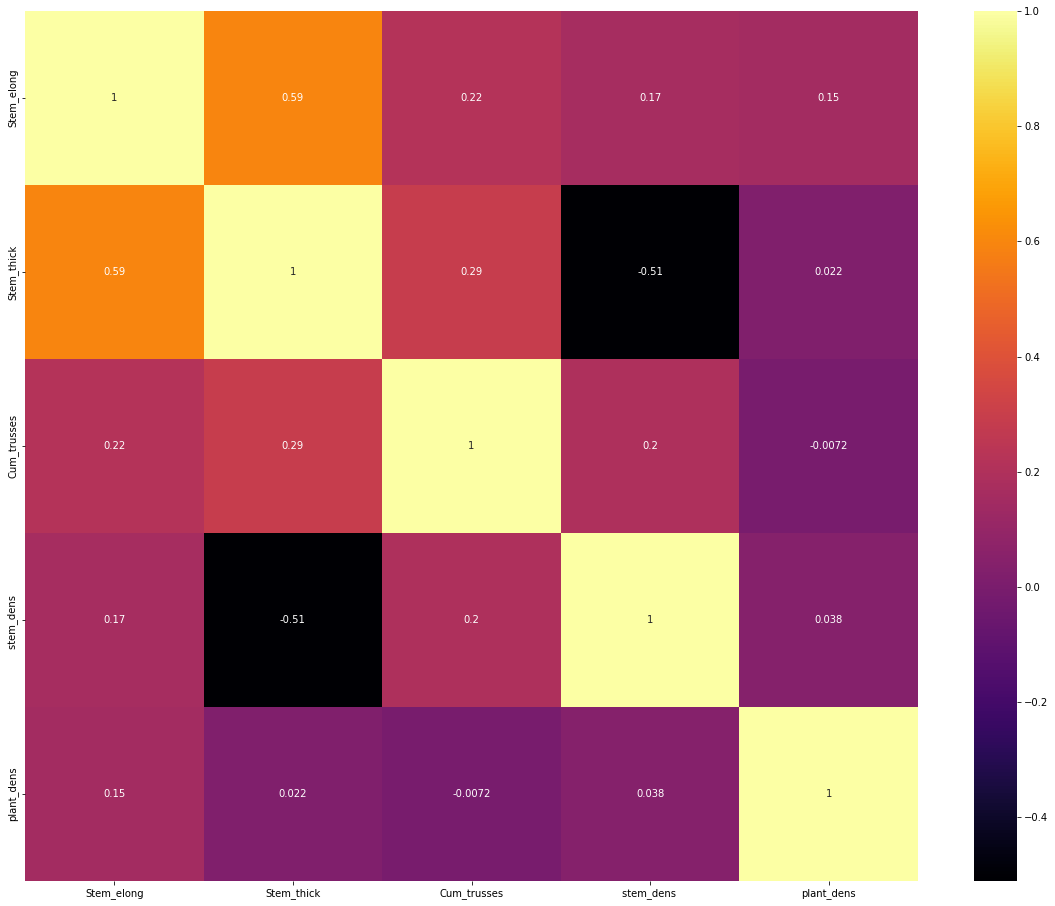

In [280]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

<Figure size 720x432 with 0 Axes>

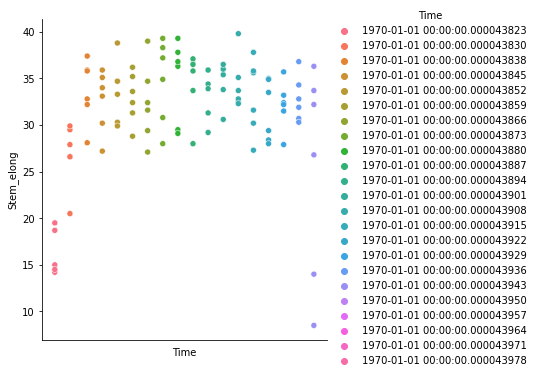

<Figure size 720x432 with 0 Axes>

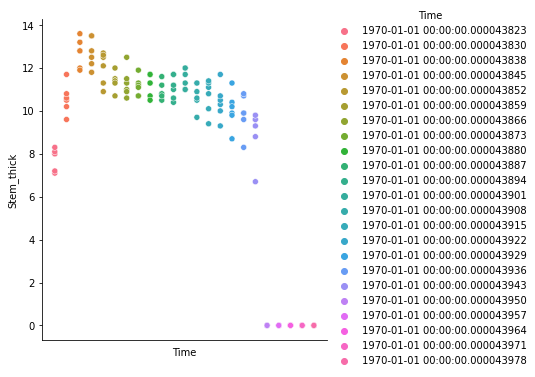

<Figure size 720x432 with 0 Axes>

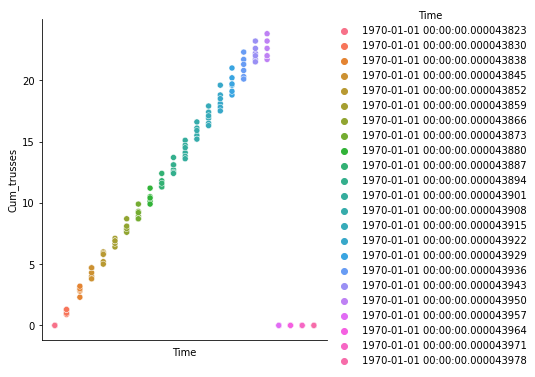

<Figure size 720x432 with 0 Axes>

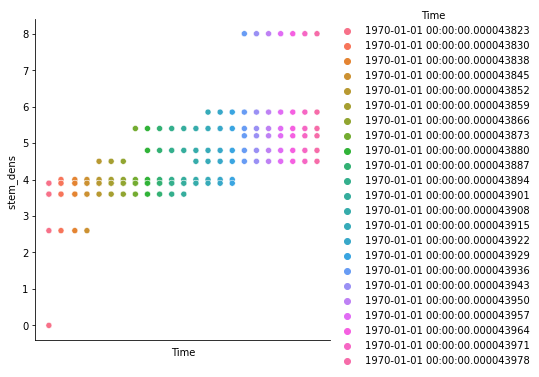

<Figure size 720x432 with 0 Axes>

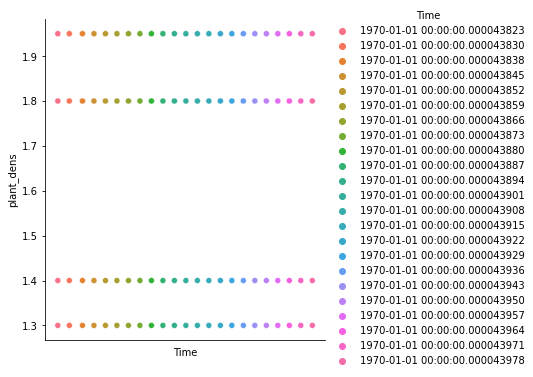

In [281]:
for i in res_crop:
    plt.figure(figsize=(10,6))
    sns.relplot(x='Time',y=i,data=crop_df,hue='Time')

<Figure size 720x432 with 0 Axes>

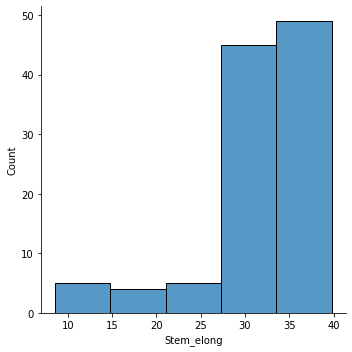

<Figure size 720x432 with 0 Axes>

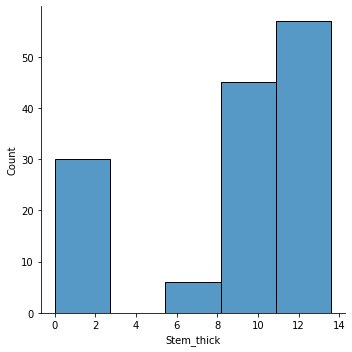

<Figure size 720x432 with 0 Axes>

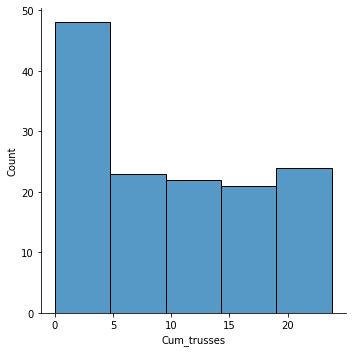

<Figure size 720x432 with 0 Axes>

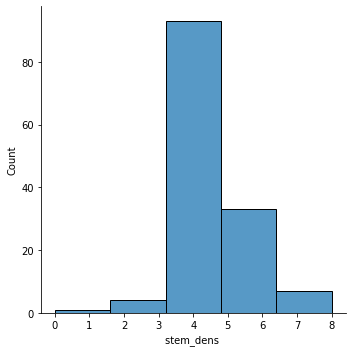

<Figure size 720x432 with 0 Axes>

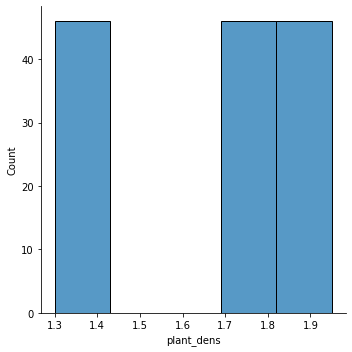

In [282]:
for i in res_crop:
    plt.figure(figsize=(10,6))
    sns.displot(crop_df[i],bins=5)